In [20]:
import pandas as pd 
import requests
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_columns', None)

------- 

# Usarei essa parte do código para juntar as infos da DPen

##### Farei isso aqui, já que a DPen é apenas um sheet específico. A ideia é rodar o código todo com frequência

In [68]:
consumo = pd.read_excel('Informações Dpen/Dados CB Produções __ dpen (Ago_2024).xlsx', sheet_name='Consumo - Aniversário da CB 130')


In [69]:
consumo["Data e Hora"]=pd.to_datetime(consumo["Data e Hora"])
consumo["Dia Hora"]=consumo["Data e Hora"].dt.strftime('%d/%m/%Y %H:00:00')


C:\Users\Dell\AppData\Local\Temp\ipykernel_19444\1692829333.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  consumo["Data e Hora"]=pd.to_datetime(consumo["Data e Hora"])


In [70]:
consumo["Dia Hora"] = pd.to_datetime(consumo["Dia Hora"])

C:\Users\Dell\AppData\Local\Temp\ipykernel_19444\1340262303.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  consumo["Dia Hora"] = pd.to_datetime(consumo["Dia Hora"])


In [71]:
consumo["nome_evento"]="Aniversário da CB 13/04"

In [72]:
consumo.head(3)

,UUID,Data e Hora,Pedido,Setor,PDV,Terminal,Nome Cliente,CPF Cliente,Cartão,Terminal SN,Cardápio,Produto,Quantidade,Preço,Total,Status,UUID Transação,Dia Hora,nome_evento
0,50c6727d-b4c1-4969-b94f-4e911b1e5043,2024-04-13 13:33:25,4900533,1. PRODUÇÃO,PRODUÇÃO,73,Produtor,NaN,4626327C,PBA1234978892,NaN,CARTÃO CASHLESS,1,5,5,Pago,NaN,2024-04-13 13:00:00,Aniversário da CB 13/04
1,e26dc3b6-f2bb-4650-be76-7af624735047,2024-04-13 13:33:56,4900551,1. PRODUÇÃO,PRODUÇÃO,73,Produtor,NaN,4688517C,PBA1234978892,NaN,CARTÃO CASHLESS,1,5,5,Pago,NaN,2024-04-13 13:00:00,Aniversário da CB 13/04
2,779f8f11-87d3-4d23-9472-5b70ef38ef8e,2024-04-13 13:34:26,4900568,1. PRODUÇÃO,PRODUÇÃO,73,Produtor,NaN,360C157C,PBA1234978892,NaN,CARTÃO CASHLESS,1,5,5,Pago,NaN,2024-04-13 13:00:00,Aniversário da CB 13/04


In [73]:
consumo= consumo.rename(columns={
    "Produto":"produto",
    "Quantidade":"quantidade",
    "Preçio":"valor_unitario",
    "Total":"valor_total",
    
})

In [74]:
dropar_colunas=[col for col in consumo.columns if col not in ["Dia Hora","produto","quantidade","valor_unitario","valor_total","nome_evento"]]

In [75]:
consumo.drop(columns=dropar_colunas,inplace=True)

In [76]:
consumo.head(3)

,produto,quantidade,valor_total,Dia Hora,nome_evento
0,CARTÃO CASHLESS,1,5,2024-04-13 13:00:00,Aniversário da CB 13/04
1,CARTÃO CASHLESS,1,5,2024-04-13 13:00:00,Aniversário da CB 13/04
2,CARTÃO CASHLESS,1,5,2024-04-13 13:00:00,Aniversário da CB 13/04


In [77]:
consumo_zig=pd.read_excel("produtos_zig.xlsx")

In [78]:
df_concatenado = pd.concat([consumo_zig, consumo], ignore_index=True)

In [79]:
df_concatenado["Dia Hora"] = pd.to_datetime(df_concatenado["Dia Hora"])

In [80]:
df_concatenado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346189 entries, 0 to 346188
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Unnamed: 0            270913 non-null  float64       
 1   categoria_produto     233275 non-null  object        
 2   cod_produto           173829 non-null  float64       
 3   produto               346189 non-null  object        
 4   fabricante            0 non-null       float64       
 5   quantidade            346189 non-null  int64         
 6   valor_unitario        233275 non-null  float64       
 7   valor_total           346189 non-null  float64       
 8   codigo_evento         233275 non-null  float64       
 9   nome_evento           346189 non-null  object        
 10  data_hora_realizacao  233275 non-null  datetime64[ns]
 11  documento_cliente     229232 non-null  object        
 12  Dia Hora              346189 non-null  datetime64[ns]
dtyp

In [81]:
consumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18819 entries, 0 to 18818
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   produto      18819 non-null  object        
 1   quantidade   18819 non-null  int64         
 2   valor_total  18819 non-null  int64         
 3   Dia Hora     18819 non-null  datetime64[ns]
 4   nome_evento  18819 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 735.2+ KB


In [82]:
df_concatenado.to_excel("produtos_zig.xlsx",sheet_name="Produtos ZIG", index=False)

------

In [83]:
api_url='https://ms.bilheteriadigital.net/partners/docs.json'


headers={
    "Authorization":"9e5304038fcc84d051c40ec8cc5a38a2b0745e8e",
    "Content-Type":"application/json"
}


response_api = requests.get(api_url, headers=headers)
api_json=response_api.json()


In [84]:
api_df=pd.DataFrame(api_json)
api_df

,swagger,info,paths,definitions,securityDefinitions,basePath
title,2.0,BD Services Partners Tickets,NaN,NaN,NaN,/partners
version,2.0,1,NaN,NaN,NaN,/partners
description,2.0,API to retrieve tickets sales informations to ...,NaN,NaN,NaN,/partners
/tickets,2.0,NaN,"{'get': {'summary': 'getTickets', 'description...",NaN,NaN,/partners
ErrorResponse,2.0,NaN,NaN,{'properties': {'error': {'title': 'ErrorRespo...,NaN,/partners
GetTicketResponse,2.0,NaN,NaN,{'properties': {'event_id': {'title': 'GetTick...,NaN,/partners
GetTicketsResponse,2.0,NaN,NaN,{'properties': {'total_records': {'title': 'Ge...,NaN,/partners
TicketsResponse,2.0,NaN,NaN,{'properties': {'success': {'title': 'TicketsR...,NaN,/partners
Authorization,2.0,NaN,NaN,NaN,"{'type': 'apiKey', 'name': 'Authorization', 'i...",/partners


In [85]:
path=pd.DataFrame(api_json["paths"]["/tickets"])
path.loc["parameters", "get"]

[{'in': 'query',
  'name': 'id_event',
  'type': 'integer',
  'description': 'ID of the event to filter tickets. Optional.',
  'required': False},
 {'in': 'query',
  'name': 'id_ticket_sector',
  'type': 'string',
  'description': 'ID of the ticket sector. Optional.',
  'required': False},
 {'in': 'query',
  'name': 'document',
  'type': 'string',
  'description': "Client's document number (CPF) to filter tickets. Optional.",
  'required': False},
 {'in': 'query',
  'name': 'return_blocked_users',
  'type': 'boolean',
  'description': 'Whether to return tickets of blocked users. Optional.',
  'required': False},
 {'in': 'query',
  'name': 'return_canceled_tickets',
  'type': 'boolean',
  'description': 'Whether to return canceled tickets. Optional.',
  'required': False},
 {'in': 'query',
  'name': 'start_date',
  'type': 'string',
  'description': 'Start date for filtering tickets. Optional.',
  'required': False},
 {'in': 'query',
  'name': 'end_date',
  'type': 'string',
  'descript

In [5]:
base_ingressos=pd.DataFrame()

pagina=1
teste_json={
  "success": True,
  "body": {
    "total_records": 0,
    "tickets": [
      {
        "event_id": "string",
        "order_id": "string",
        "sector_id": "string",
        "ticket_id": "string",
        "ticket_type_id": "string",
        "event_name": "string",
        "event_start_datetime": "string",
        "event_end_datetime": "string",
        "sector_name": "string",
        "ticket_type_name": "string",
        "value": "string",
        "ticket_status": "string",
        "ticket_used_flag": True,
        "client_document": "string",
        "client_name": "string",
        "client_email": "string",
        "client_phone": "string",
        "client_address": "string",
        "client_address_number": "string",
        "client_address_complement": "string",
        "client_neighborhood": "string",
        "client_city": "string",
        "client_state": "string",
        "client_zip_code": "string",
        "client_blocked_flag": True
      }
    ]
  }
}
while teste_json["body"]["tickets"]!=[]:   
    api_url='https://ms.bilheteriadigital.net/partners/tickets'


    headers={
        "Authorization":"9e5304038fcc84d051c40ec8cc5a38a2b0745e8e",
        "Content-Type":"application/json"
    }


    parametros={
        "page":pagina,
        "limit":3000
    }

    response_teste = requests.get(api_url, headers=headers, params=parametros)
    teste_json=response_teste.json()


    teste_json_2=teste_json["body"]["tickets"]
    temp_df=pd.DataFrame(teste_json_2)
    base_ingressos=pd.concat([base_ingressos,temp_df],ignore_index=True)

    pagina+=1
base_ingressos


,ticket_id,ticket_status,ticket_used_flag,value,sector_id,sector_name,ticket_type_id,event_id,event_name,event_start_datetime,event_end_datetime,order_id,ticket_type_name,client_document,client_name,client_email,client_phone,client_address,client_address_number,client_address_complement,client_neighborhood,client_city,client_state,client_zip_code,client_blocked_flag
0,210271188,W,2023-12-16T18:34:43.000Z,65,129161,INGRESSO,491231,54650,16/12 - BatuKaKaU (Pagode de rua),2023-12-16T13:00:00.000Z,2023-12-16T21:00:00.000Z,11101728.0,INGRESSO,75248409187,Ronaldo Lopes Gomes,ronaldolopes7032@gmail.com,62994151537,Avenida Cinco de MarÃ§o,76,Sem Complemento,Jardim Dom Fernando I,Goiânia,GO,74765450,0.0
1,210271116,W,2023-12-16T16:12:36.000Z,65,129161,INGRESSO,491231,54650,16/12 - BatuKaKaU (Pagode de rua),2023-12-16T13:00:00.000Z,2023-12-16T21:00:00.000Z,11101633.0,INGRESSO,00890404143,Larissa Miranda de Pádua,larissadepadua@gmail.com,62981809049,,,,,Goiânia,GO,74265280,0.0
2,210270915,W,None,65,129161,INGRESSO,491231,54650,16/12 - BatuKaKaU (Pagode de rua),2023-12-16T13:00:00.000Z,2023-12-16T21:00:00.000Z,11101413.0,INGRESSO,14277924611,Tatiane Severino Borges,tatianeborges-s@hotmail.com,62999159674,Rua Vitória,202,Residencial flores,Alto da Glória,Goiânia,GO,74815745,0.0
3,210270924,W,2023-12-16T16:05:56.000Z,65,129161,INGRESSO,491231,54650,16/12 - BatuKaKaU (Pagode de rua),2023-12-16T13:00:00.000Z,2023-12-16T21:00:00.000Z,11101395.0,INGRESSO,03894667192,Gabriela macedo freire,gaabyh_macedo@hotmail.com,6292125815,Rua cristo redentor qd 07 lt 30,01,,Jardim pompeia,Goiânia,GO,74685690,1.0
4,210270097,W,2023-12-16T16:25:56.000Z,65,129161,INGRESSO,491231,54650,16/12 - BatuKaKaU (Pagode de rua),2023-12-16T13:00:00.000Z,2023-12-16T21:00:00.000Z,11100442.0,INGRESSO,04186368180,erik sousa moreira,erikbeludo@hotmail.com,62982271666,Rua Esmeralda,casa01,casa,Aeroviário,Goiânia,GO,74435030,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51951,209933821,I,2023-12-02T14:50:18.000Z,0,128989,BACKSTAGE,491329,52539,02/12 - TARDEZINHA | RIBEIRÃO PRETO | CORTESIAS,2023-12-02T15:00:00.000Z,None,None,BACKSTAGE I SEU TIBERIO,,,,,,,,,,,,None
51952,209933828,I,2023-12-02T14:50:24.000Z,0,128989,BACKSTAGE,491329,52539,02/12 - TARDEZINHA | RIBEIRÃO PRETO | CORTESIAS,2023-12-02T15:00:00.000Z,None,None,BACKSTAGE I SEU TIBERIO,,,,,,,,,,,,None
51953,209933832,I,2023-12-02T14:50:28.000Z,0,128989,BACKSTAGE,491329,52539,02/12 - TARDEZINHA | RIBEIRÃO PRETO | CORTESIAS,2023-12-02T15:00:00.000Z,None,None,BACKSTAGE I SEU TIBERIO,,,,,,,,,,,,None
51954,209933838,I,2023-12-02T14:50:32.000Z,0,128989,BACKSTAGE,491329,52539,02/12 - TARDEZINHA | RIBEIRÃO PRETO | CORTESIAS,2023-12-02T15:00:00.000Z,None,None,BACKSTAGE I SEU TIBERIO,,,,,,,,,,,,None


In [26]:
base_ingressos.columns

Index(['ticket_id', 'ticket_status', 'ticket_used_flag', 'value', 'sector_id',
       'sector_name', 'ticket_type_id', 'event_id', 'event_name',
       'event_start_datetime', 'event_end_datetime', 'order_id',
       'ticket_type_name', 'client_document', 'client_name', 'client_email',
       'client_phone', 'client_address', 'client_address_number',
       'client_address_complement', 'client_neighborhood', 'client_city',
       'client_state', 'client_zip_code', 'client_blocked_flag'],
      dtype='object')

In [8]:
base_ingressos2=base_ingressos.drop(columns=["event_start_datetime","sector_id","sector_name","event_end_datetime","client_address","client_address_number","client_address_complement","client_neighborhood","client_zip_code","client_blocked_flag"])
base_ingressos2["ticket_used_flag"]=pd.to_datetime(base_ingressos2["ticket_used_flag"])

In [9]:
base_ingressos2["ticket_used_flag"]=base_ingressos2["ticket_used_flag"].dt.strftime('%d/%m/%Y %H:00:00')

In [10]:
base_ingressos2["event_name"].unique()

array(['16/12 - BatuKaKaU (Pagode de rua)',
       '15/07 - TARDEZINHA | CAMPINAS',
       '02/12 - TARDEZINHA | RIBEIRÃO PRETO',
       '02/12 - TARDEZINHA | ELO | RIBEIRÃO PRETO',
       '02/12 - TARDEZINHA | RIBEIRÃO PRETO | CORTESIAS',
       '21/10 - ASertanejada (NOVA DATA)',
       '20/09 - ASertanejada apresenta AViolada',
       '15/07 - TARDEZINHA | CAMPINAS - BACKSTAGE',
       '15/07 - TARDEZINHA | CAMPINAS - CORTESIAS',
       '15/07 - TARDEZINHA | ELO | CAMPINAS'], dtype=object)

In [11]:
base_ingressos2["event_name"].value_counts()

event_name
15/07 - TARDEZINHA | CAMPINAS                      22903
02/12 - TARDEZINHA | RIBEIRÃO PRETO                14532
21/10 - ASertanejada (NOVA DATA)                    5113
02/12 - TARDEZINHA | RIBEIRÃO PRETO | CORTESIAS     3329
15/07 - TARDEZINHA | CAMPINAS - CORTESIAS           1981
15/07 - TARDEZINHA | CAMPINAS - BACKSTAGE           1913
15/07 - TARDEZINHA | ELO | CAMPINAS                 1161
02/12 - TARDEZINHA | ELO | RIBEIRÃO PRETO            783
20/09 - ASertanejada apresenta AViolada              195
16/12 - BatuKaKaU (Pagode de rua)                     46
Name: count, dtype: int64

In [12]:
base_ingressos2["num_ing"]=1

In [13]:
base_ingressos2.rename(columns={
    "event_id": "id_evento",
    "event_name": "Evento",
    "ticket_type_name":"Tipo de ingresso",
    "value":"price_ing",
    "client_email":"email_comprador",
    "client_phone":"phone_comprador",
    #"ticket_used_flag":""




},inplace=True)

,ticket_id,ticket_status,,price_ing,ticket_type_id,id_evento,Evento,order_id,Tipo de ingresso,client_document,client_name,email_comprador,phone_comprador,client_city,client_state,num_ing
0,210271188,W,16/12/2023 18:00:00,65,491231,54650,16/12 - BatuKaKaU (Pagode de rua),11101728.0,INGRESSO,75248409187,Ronaldo Lopes Gomes,ronaldolopes7032@gmail.com,62994151537,Goiânia,GO,1
1,210271116,W,16/12/2023 16:00:00,65,491231,54650,16/12 - BatuKaKaU (Pagode de rua),11101633.0,INGRESSO,00890404143,Larissa Miranda de Pádua,larissadepadua@gmail.com,62981809049,Goiânia,GO,1
2,210270915,W,NaN,65,491231,54650,16/12 - BatuKaKaU (Pagode de rua),11101413.0,INGRESSO,14277924611,Tatiane Severino Borges,tatianeborges-s@hotmail.com,62999159674,Goiânia,GO,1
3,210270924,W,16/12/2023 16:00:00,65,491231,54650,16/12 - BatuKaKaU (Pagode de rua),11101395.0,INGRESSO,03894667192,Gabriela macedo freire,gaabyh_macedo@hotmail.com,6292125815,Goiânia,GO,1
4,210270097,W,16/12/2023 16:00:00,65,491231,54650,16/12 - BatuKaKaU (Pagode de rua),11100442.0,INGRESSO,04186368180,erik sousa moreira,erikbeludo@hotmail.com,62982271666,Goiânia,GO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51951,209933821,I,02/12/2023 14:00:00,0,491329,52539,02/12 - TARDEZINHA | RIBEIRÃO PRETO | CORTESIAS,None,BACKSTAGE I SEU TIBERIO,,,,,,,1
51952,209933828,I,02/12/2023 14:00:00,0,491329,52539,02/12 - TARDEZINHA | RIBEIRÃO PRETO | CORTESIAS,None,BACKSTAGE I SEU TIBERIO,,,,,,,1
51953,209933832,I,02/12/2023 14:00:00,0,491329,52539,02/12 - TARDEZINHA | RIBEIRÃO PRETO | CORTESIAS,None,BACKSTAGE I SEU TIBERIO,,,,,,,1
51954,209933838,I,02/12/2023 14:00:00,0,491329,52539,02/12 - TARDEZINHA | RIBEIRÃO PRETO | CORTESIAS,None,BACKSTAGE I SEU TIBERIO,,,,,,,1


In [22]:
base_ingressos2[base_ingressos2["event_name"]=="02/12 - TARDEZINHA | RIBEIRÃO PRETO"]

,ticket_id,ticket_status,ticket_used_flag,value,ticket_type_id,event_id,event_name,order_id,ticket_type_name,client_document,client_name,client_email,client_phone,client_city,client_state,num_ing
38,209946702,W,02/12/2023 21:00:00,790,413470,45452,02/12 - TARDEZINHA | RIBEIRÃO PRETO,10917271.0,BACKSTAGE,06299796693,matheus adriano muniz,matheusadrianomuniz@hotmail.com,47996243773,Ermidinha (Montes Claros),MG,1
39,50165059,W,02/12/2023 20:00:00,450,417894,45452,02/12 - TARDEZINHA | RIBEIRÃO PRETO,10915918.0,BACKSTAGE PRÉ-VENDA,42118959826,Eva Maria Domingues natalino,evanatalino@hotmail.com,,Matão,SP,1
40,50165060,W,02/12/2023 20:00:00,490,413473,45452,02/12 - TARDEZINHA | RIBEIRÃO PRETO,10915801.0,BACKSTAGE PRÉ-VENDA,20153606894,Denis Alexandre barioni,barionialexandre7@gmail.com,,Matão,SP,1
41,209944288,W,02/12/2023 19:00:00,650,417861,45452,02/12 - TARDEZINHA | RIBEIRÃO PRETO,10915400.0,PISTA PREMIUM,33390194878,Lucas Righi,lucas_righi4@hotmail.com,11991819128,São Paulo,SP,1
42,209943319,W,02/12/2023 18:00:00,790,413470,45452,02/12 - TARDEZINHA | RIBEIRÃO PRETO,10914702.0,BACKSTAGE,44915054896,Heitor Felipe do Nascimento Silva,heitor2754@gmail.com,16988332623,Ribeirão Preto,SP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46358,209940449,I,02/12/2023 15:00:00,790,413470,45452,02/12 - TARDEZINHA | RIBEIRÃO PRETO,NaN,BACKSTAGE,,,,,,,1
46359,209937019,I,02/12/2023 17:00:00,650,417861,45452,02/12 - TARDEZINHA | RIBEIRÃO PRETO,NaN,PISTA PREMIUM,,,,,,,1
46360,209937020,I,02/12/2023 17:00:00,540,417882,45452,02/12 - TARDEZINHA | RIBEIRÃO PRETO,NaN,PISTA PREMIUM,,,,,,,1
46361,209943056,I,02/12/2023 18:00:00,540,417882,45452,02/12 - TARDEZINHA | RIBEIRÃO PRETO,NaN,PISTA PREMIUM,,,,,,,1


In [23]:
x=base_ingressos2[base_ingressos2["event_name"]=="02/12 - TARDEZINHA | RIBEIRÃO PRETO"]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '02/12/2023 21:00:00'),
  Text(1, 0, '02/12/2023 20:00:00'),
  Text(2, 0, '02/12/2023 19:00:00'),
  Text(3, 0, '02/12/2023 18:00:00'),
  Text(4, 0, '02/12/2023 17:00:00'),
  Text(5, 0, '02/12/2023 15:00:00'),
  Text(6, 0, '02/12/2023 16:00:00'),
  Text(7, 0, '02/12/2023 14:00:00'),
  Text(8, 0, '02/12/2023 13:00:00'),
  Text(9, 0, '02/12/2022 17:00:00')])

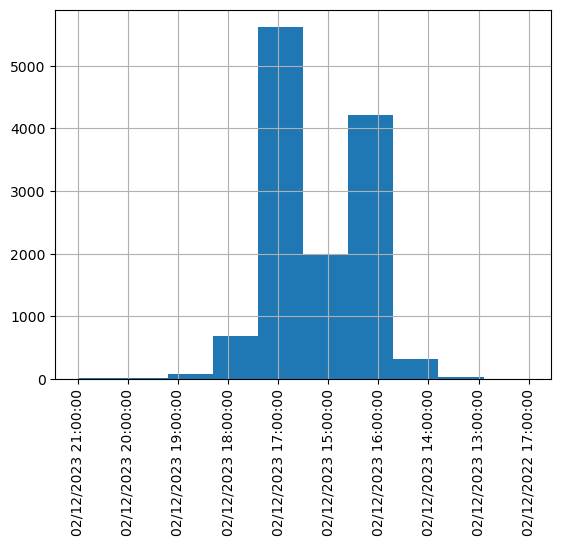

In [24]:
x["ticket_used_flag"].hist()
plt.xticks(rotation=90)